In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [2]:
"""
Testing an example code:
"""


p = 0.5
q = 1 - p
# All the length where the walker can maneuver. Must be odd to have integer median.
maneuver_length = 21
# Every element in DATA shows the lifetime of the walker if it sarts
# from each of the maneuvrable positions on x.
DATA = np.zeros(maneuver_length)
for initial_postition in np.arange(1, maneuver_length+1, dtype=int):
    # The position array with traps at 0 and 20; maneuver_length is 19
    x = np.zeros(maneuver_length+2)
    # Putting probability 1 in the initial position:
    x[initial_postition] = 1
    # This is a counter that will be added to with every step:
    mean_lifetime = 0
    # As long as the probability of finding the walker in the end points (the traps) is smaller then the cut-off
    # probability 0.999, the program has to keep running. When it reaches 0.999, it is safe to say the walker has
    # slipped into the traps and died.
    while (x[0]+x[-1]) < 0.999:
        # If we change x while traversing it, we will get incorrect results. So we need a temporary variable
        # to store x for us, traverse x, change temp, put the resulting temp in x, and finally reinitialize temp.
        temp = np.zeros_like(x)
        # The end-points (the traps) shouldn't change:
        temp[0] = x[0]
        temp[-1] = x[-1]
        # Can't traverse the traps, only 1 through 19.
        for i in range(1,len(x)-1):
            temp[i+1] += x[i] * p
            temp[i-1] += x[i] * q
        x = temp.copy()
        mean_lifetime += np.sum(x[1:-2])
    DATA[initial_postition-1] = mean_lifetime  # initial_position-1, because initial_position starts from 1, not 0.

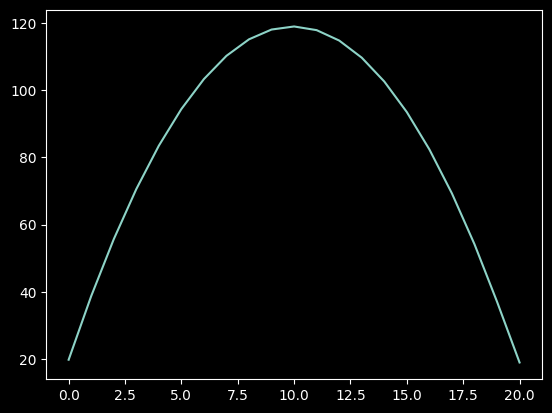

In [3]:
"""
Plottting the example code:
"""


plt.plot(range(len(DATA)), DATA);

In [5]:
"""
Turning the example code into a function:
"""


def rwt_census(p=0.5, maneuver_length: int=21, cut_off_probability: float=0.999):
    """
    Random Walker with Trap, Census Algorithm.

    p: probability of taking a step right

    maneuver_length: The length of x the walker can walk on, without including the traps;
    the two traps will be set at the two ends of this length.
    maneuver_length must be an odd integer to have an integer median.

    cut_off_probability: As long as the probability of finding the walker in the end points (the traps)
    is smaller then the cut-off probability, the program has to keep running.
    When it reaches the cut-off probability, it is safe to say the walker has slipped into the traps and died.
    """


    q = 1 - p
    # Every element in DATA shows the lifetime of the walker if it sarts
    # from each of the maneuvrable positions on x.
    DATA = np.zeros(maneuver_length)
    for initial_postition in np.arange(1, maneuver_length+1, dtype=int):
        # The position array with traps at the two ends of it
        x = np.zeros(maneuver_length+2)
        # Putting probability 1 in the initial position:
        x[initial_postition] = 1
        # This is a counter that will be added to with every step:
        mean_lifetime = 0
        while (x[0]+x[-1]) < cut_off_probability:
            # If we change x while traversing it, we will get incorrect results.
            # So we need a temporary variable to store x for us, traverse x, change temp,
            # put the resulting temp in x, and finally reinitialize temp.
            temp = np.zeros_like(x)
            # The end-points (the traps) shouldn't change:
            temp[0] = x[0]
            temp[-1] = x[-1]
            # Can't traverse the traps, only 1 through maneuver_length.
            for i in range(1,len(x)-1):
                temp[i+1] += x[i] * p
                temp[i-1] += x[i] * q
            x = temp.copy()
            mean_lifetime += np.sum(x[1:-2])
        # (initial_position-1), because initial_position starts from 1, not 0.
        DATA[initial_postition-1] = mean_lifetime
    

    return  DATA

In [6]:
"""
Generating the data using the function just declared:
"""


# Takes 5 seconds for cut-off probability=0.999999
maneuver_length = 19
cut_off_probability = 0.999
probabilites = np.arange(0.1, 1, 0.1)
# Data of average lifetime for different probabilites p, and for different initial positions:
DDAATTAA = np.zeros((len(probabilites), maneuver_length))
# Generate the data for all the probabilities p in {0.1, 0.2, ..., 0.9}
for i in range(len(probabilites)):
    DDAATTAA[i, :] = rwt_census(p=probabilites[i], maneuver_length=maneuver_length, cut_off_probability=cut_off_probability)

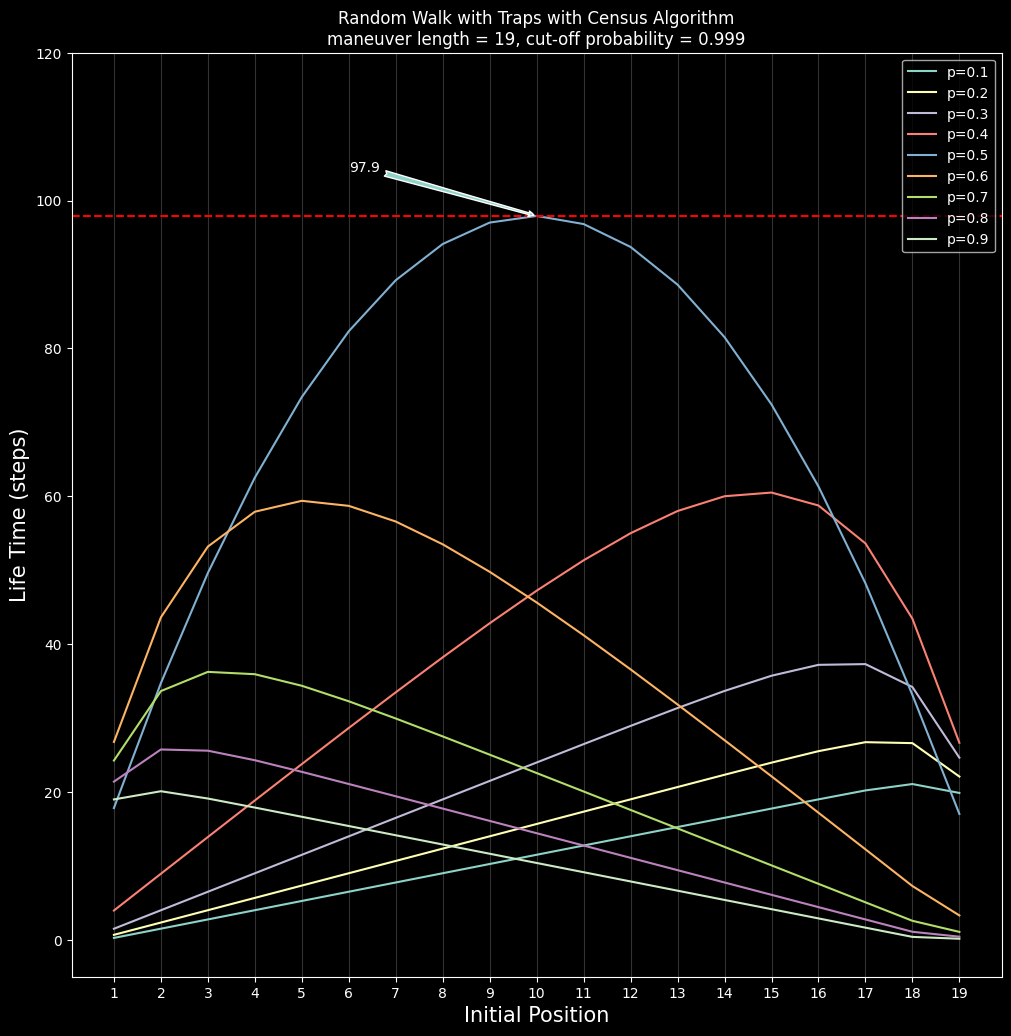

In [7]:
"""
Plotting:
"""


fig, ax = plt.subplots(figsize=(12,12))

# the x values for the plot (basically, it's just the initial positions):
xs = np.arange(1, (maneuver_length)+1)

# aesthetics:
ax.set_title(f"Random Walk with Traps with Census Algorithm\n\
maneuver length = {maneuver_length}, cut-off probability = {cut_off_probability}")
ax.set_xlabel("Initial Position", fontsize=15)
ax.set_ylabel("Life Time (steps)", fontsize=15)
ax.set_xticks(xs)
# ax.set_xticklabels(labels=xs, rotation=90)
ax.grid(axis="x", alpha=0.2)

# Plotting data:
for i in range(9):
    ax.plot(xs, DDAATTAA[i], label=f"p={probabilites[i]:.1f}")


ax.axhline(DDAATTAA[4].max(), color="red", linestyle="--")
ax.set_ylim((-5,120))
ax.annotate(text=f"{DDAATTAA[4].max():.1f}", xy=(10, DDAATTAA[4].max()),
            xytext=(6, DDAATTAA[4].max()+6), arrowprops={"arrowstyle":"fancy", "connectionstyle":"arc3"})
# ax.set_yticks(np.append(ax.get_yticks()[1:], DDAATTAA[4].max()))
ax.legend();

In [9]:
# fig.savefig("Exercise5_4_19.jpg")

In [10]:
"""
Generating the data using the function just declared:
"""


# Takes 5 seconds for cut-off probability=0.999999
maneuver_length = 39
cut_off_probability = 0.999
probabilites = np.arange(0.1, 1, 0.1)
# Data of average lifetime for different probabilites p, and for different initial positions:
DDAATTAA = np.zeros((len(probabilites), maneuver_length))
# Generate the data for all the probabilities p in {0.1, 0.2, ..., 0.9}
for i in range(len(probabilites)):
    DDAATTAA[i, :] = rwt_census(p=probabilites[i], maneuver_length=maneuver_length, cut_off_probability=cut_off_probability)

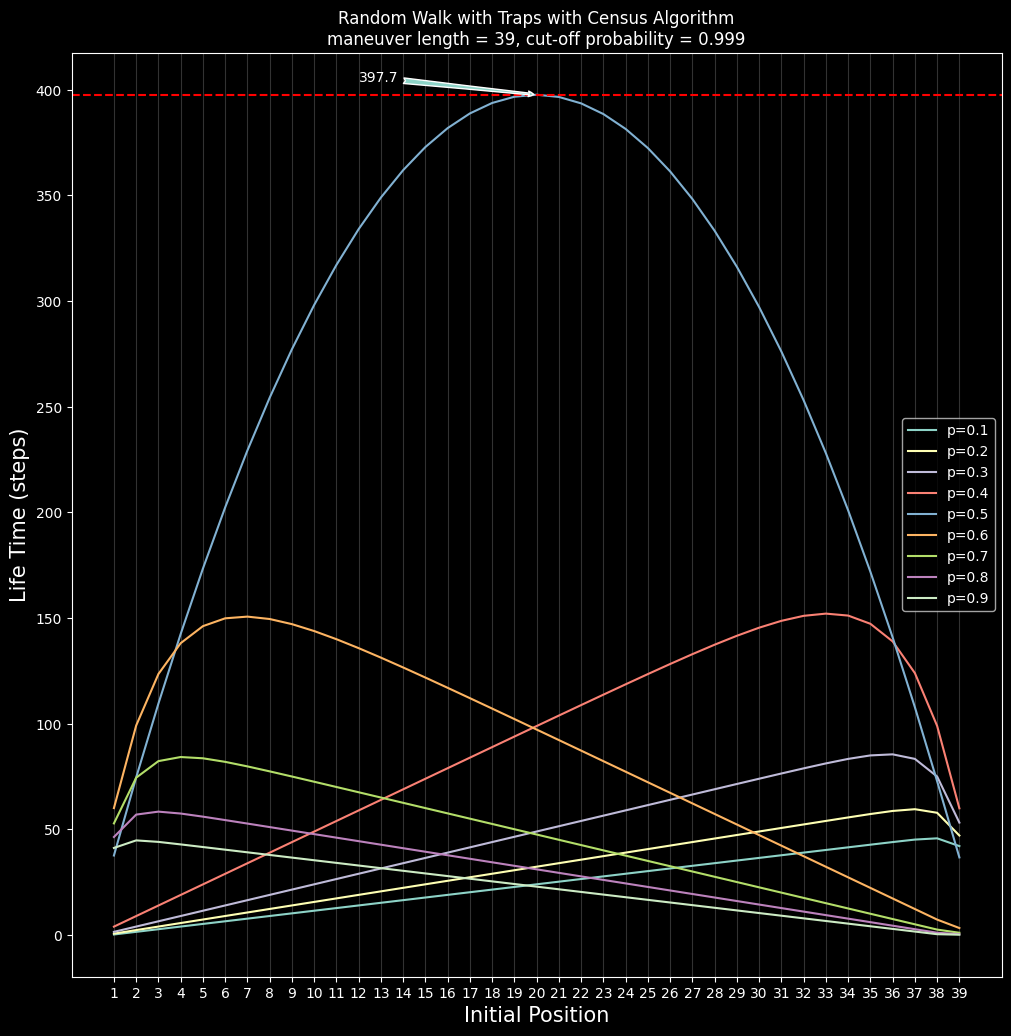

In [11]:
"""
Plotting:
"""


fig, ax = plt.subplots(figsize=(12,12))

# the x values for the plot (basically, it's just the initial positions):
xs = np.arange(1, (maneuver_length)+1)

# aesthetics:
ax.set_title(f"Random Walk with Traps with Census Algorithm\n\
maneuver length = {maneuver_length}, cut-off probability = {cut_off_probability}")
ax.set_xlabel("Initial Position", fontsize=15)
ax.set_ylabel("Life Time (steps)", fontsize=15)
ax.set_xticks(xs)
# ax.set_xticklabels(labels=xs, rotation=90)
ax.grid(axis="x", alpha=0.2)

# Plotting data:
for i in range(9):
    ax.plot(xs, DDAATTAA[i], label=f"p={probabilites[i]:.1f}")


ax.axhline(DDAATTAA[4].max(), color="red", linestyle="--")
ax.annotate(text=f"{DDAATTAA[4].max():.1f}", xy=(20, DDAATTAA[4].max()),
            xytext=(12, DDAATTAA[4].max()+6), arrowprops={"arrowstyle":"fancy", "connectionstyle":"arc3"})
# ax.set_yticks(np.append(ax.get_yticks()[1:], DDAATTAA[4].max()))
ax.legend();

In [13]:
# fig.savefig("Exercise5_4_39.jpg")

In [14]:
"""
Generating the data using the function just declared:
"""


# Takes 5 seconds for cut-off probability=0.999999
maneuver_length = 19
cut_off_probability = 0.999999
probabilites = np.arange(0.1, 1, 0.1)
# Data of average lifetime for different probabilites p, and for different initial positions:
DDAATTAA = np.zeros((len(probabilites), maneuver_length))
# Generate the data for all the probabilities p in {0.1, 0.2, ..., 0.9}
for i in range(len(probabilites)):
    DDAATTAA[i, :] = rwt_census(p=probabilites[i], maneuver_length=maneuver_length, cut_off_probability=cut_off_probability)

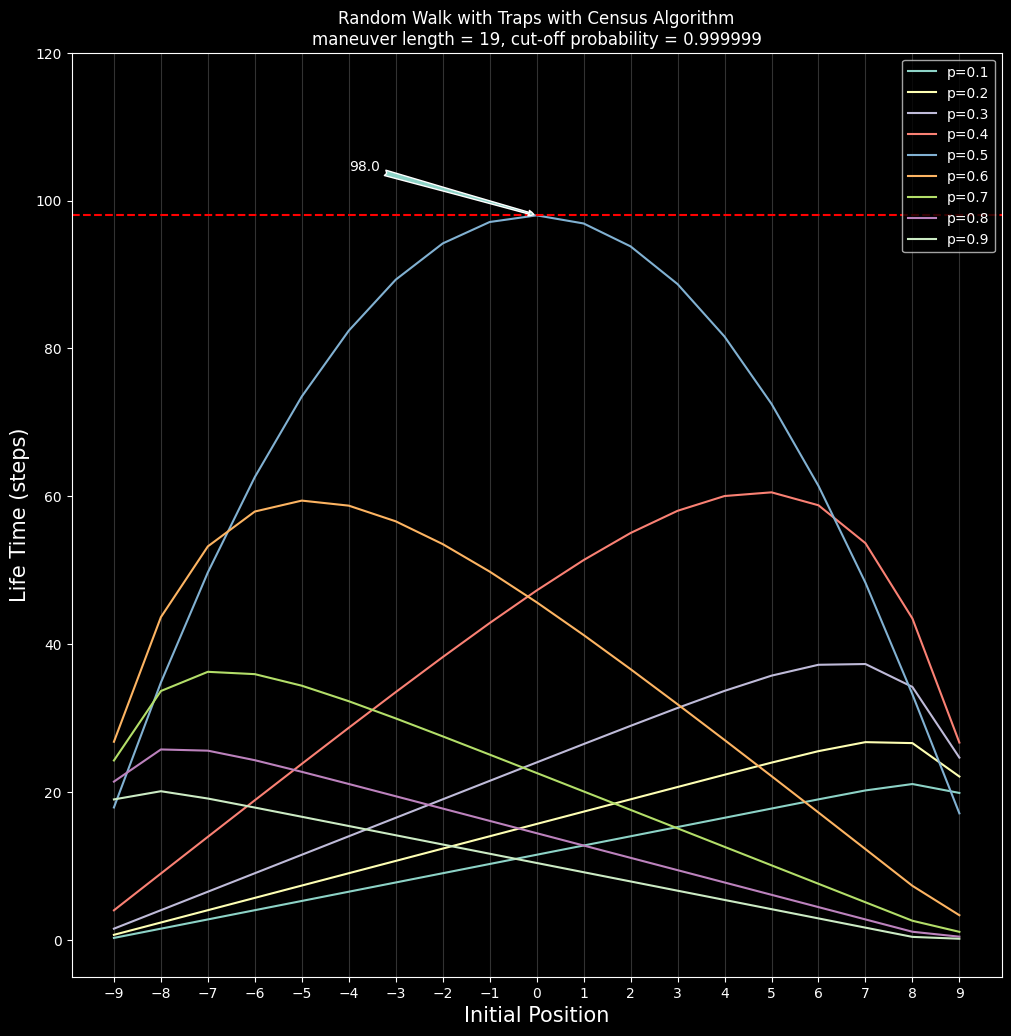

In [15]:
"""
Plotting:
"""


fig, ax = plt.subplots(figsize=(12,12))

# Setting the median on 0
# the x values for the plot (basically, it's just the initial positions):
xs = np.arange(-maneuver_length//2+1, -maneuver_length//2+1+(maneuver_length))

# aesthetics:
ax.set_title(f"Random Walk with Traps with Census Algorithm\n\
maneuver length = {maneuver_length}, cut-off probability = {cut_off_probability}")
ax.set_xlabel("Initial Position", fontsize=15)
ax.set_ylabel("Life Time (steps)", fontsize=15)
ax.set_xticks(xs)
# ax.set_xticklabels(labels=xs, rotation=90)
ax.grid(axis="x", alpha=0.2)

# Plotting data:
for i in range(9):
    ax.plot(xs, DDAATTAA[i], label=f"p={probabilites[i]:.1f}")

ax.set_ylim((-5,120))
ax.axhline(DDAATTAA[4].max(), color="red", linestyle="--")
ax.annotate(text=f"{DDAATTAA[4].max():.1f}", xy=(0, DDAATTAA[4].max()),
            xytext=(-4, DDAATTAA[4].max()+6), arrowprops={"arrowstyle":"fancy", "connectionstyle":"arc3"})
# ax.set_yticks(np.append(ax.get_yticks()[1:], DDAATTAA[4].max()))
ax.legend();

In [16]:
# fig.savefig("Exercise5_4_1010.jpg")